In [1]:
!pip install numpy


In [2]:
!pip install matplotlib


In [3]:
!pip install seaborn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/content/Diwali Sales Data.csv", encoding='unicode_escape')

In [9]:
df.shape

(11251, 15)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
df.drop(['Status','unnamed1'], axis=1, inplace = True )

In [14]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [16]:
df.dropna(inplace=True)

In [18]:
df['Amount'] = df['Amount'].astype('int') #change datatype

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


DATA ANALYSIS

GENDER

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

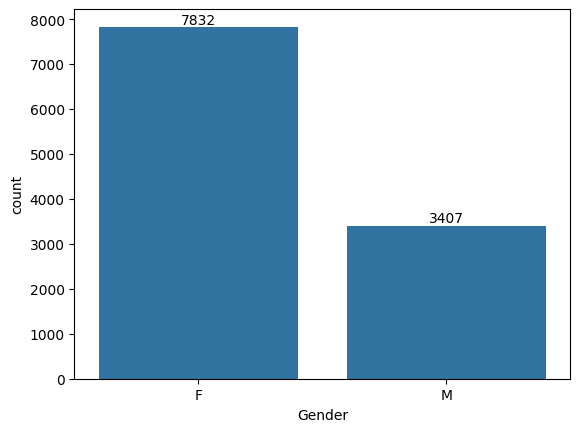

In [22]:
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

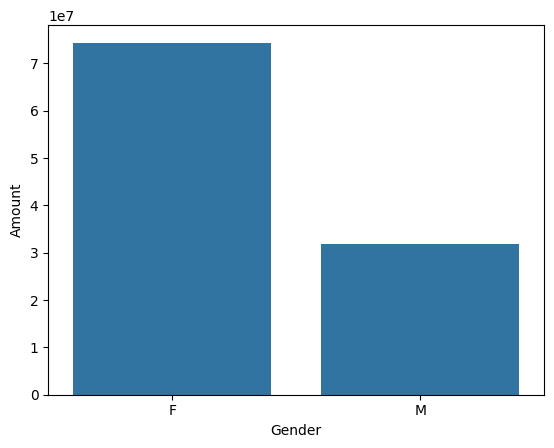

In [24]:
sales_gen =df.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.barplot(x ='Gender', y='Amount', data=sales_gen )

Female shop more than men

AGE

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

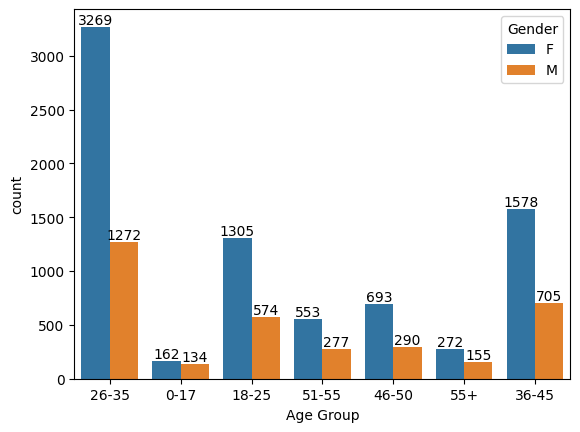

In [27]:
ax = sns.countplot( data = df, x = 'Age Group', hue ='Gender')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

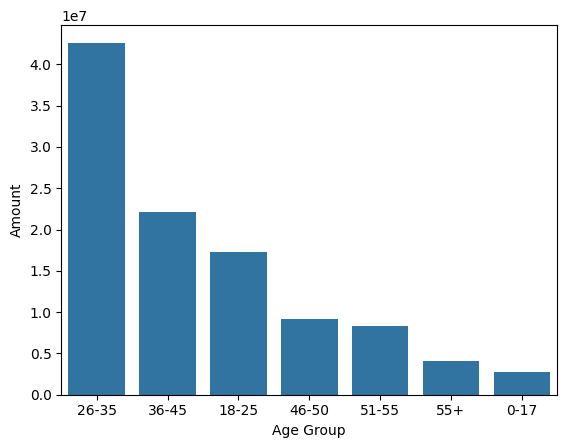

In [28]:
sales_age =df.groupby(['Age Group'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.barplot(x ='Age Group', y='Amount', data=sales_age )

age group is 22-35 and females

STATE

<Axes: xlabel='State', ylabel='Orders'>

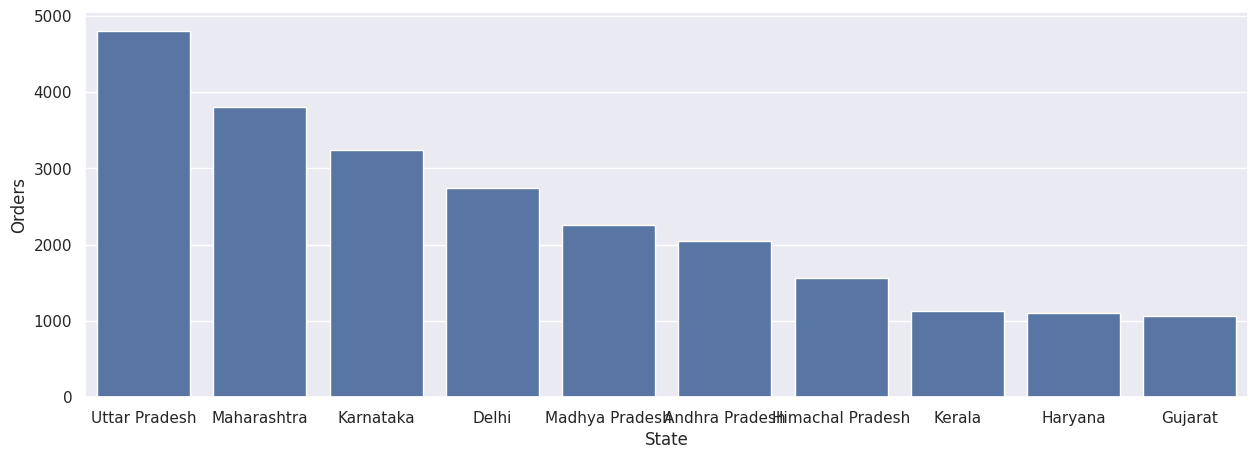

In [31]:
state_sales = df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = state_sales, x = 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

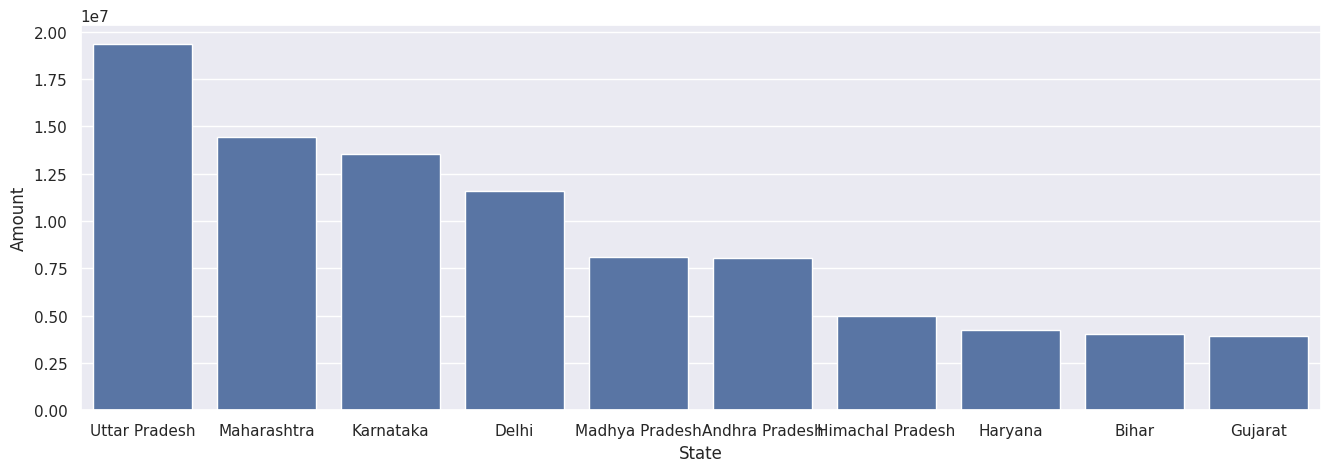

In [33]:
state_sales = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = state_sales, x = 'State', y = 'Amount')

haryana has more purchasing power

MARITIAL STATUS

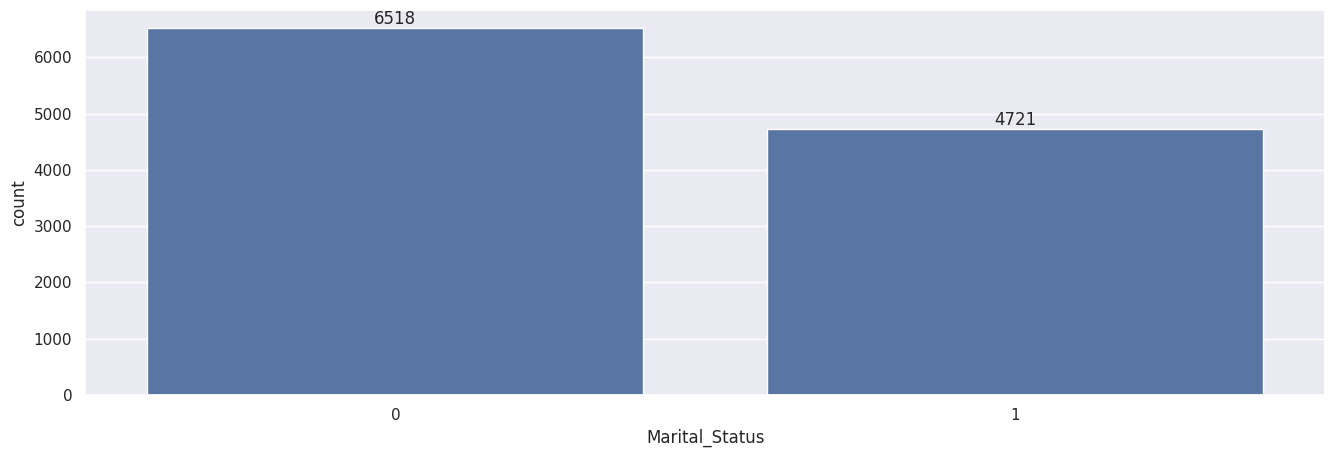

In [35]:
ax = sns.countplot( data = df, x = 'Marital_Status')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

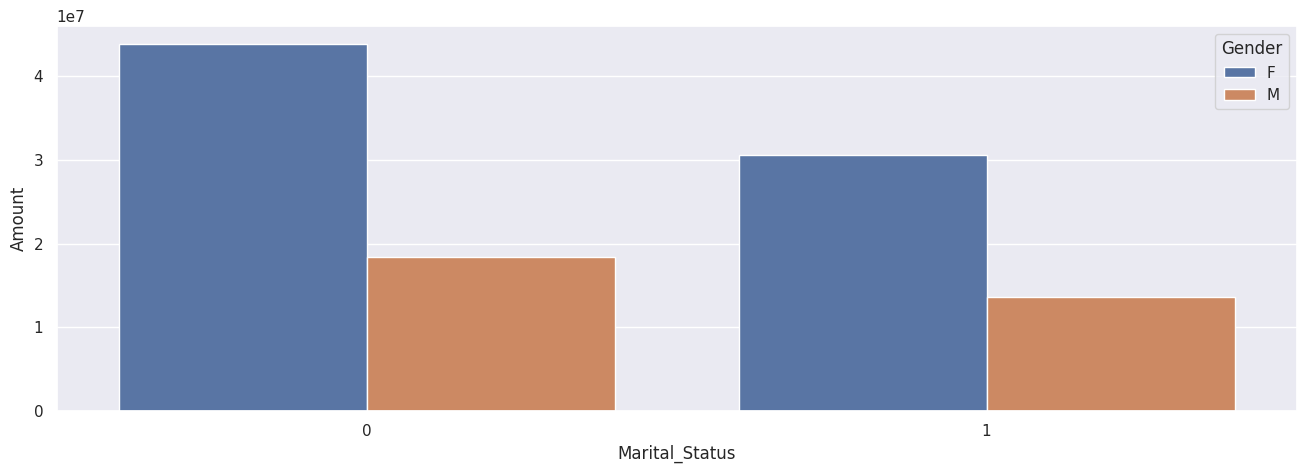

In [37]:
marital_sales = df.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = marital_sales, x = 'Marital_Status', y = 'Amount', hue='Gender')

married women has more purchasing power

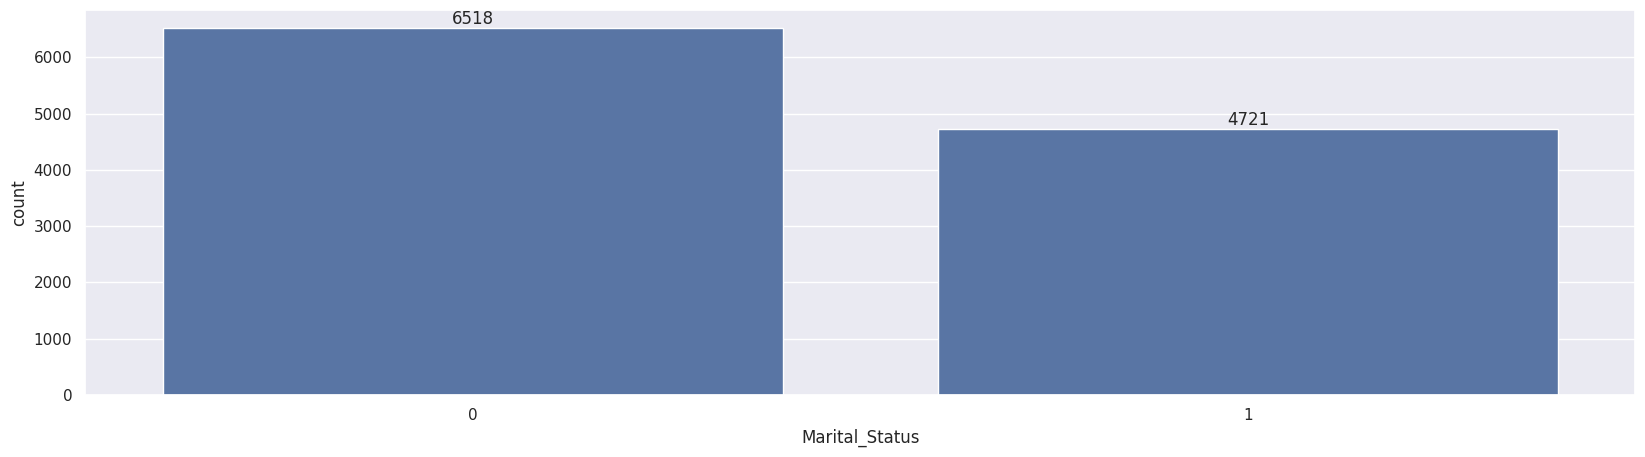

In [39]:
sns.set(rc = {'figure.figsize': (20,5)})
ax = sns.countplot( data = df, x = 'Marital_Status')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

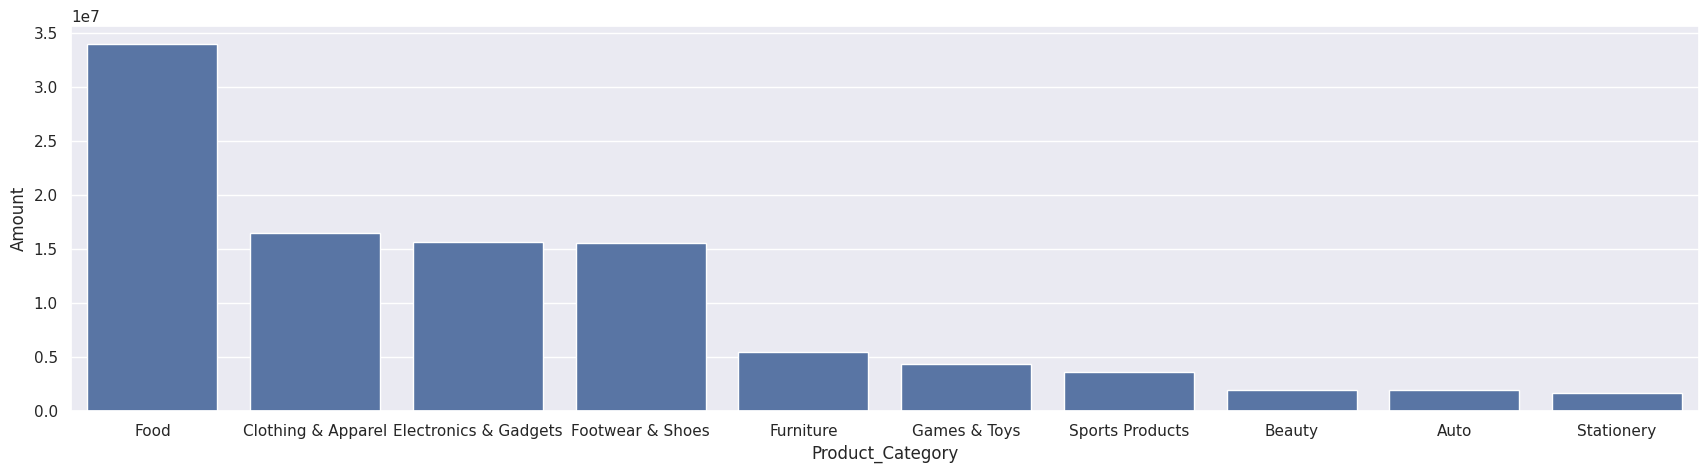

In [45]:
product_sales = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(21,5)})
sns.barplot(data = product_sales, x = 'Product_Category', y = 'Amount')